# EE25737: Introduction to Machine Learning

## Shahab Rahimirad
## 95104663

## Step One

part 1: nans

In [ ]:
import pandas as pd
data = pd.read_csv("train.csv")
nans = data.isna().sum()
print(nans)
nansPercent = nans / len(data)
print(nansPercent)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


part 2: titles creation

In [ ]:

data['Title'] = data.apply(lambda row: row['Name'].split(",")[1].split('.')[0][1:] , axis=1) 
print(data.Title)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object


part 3 : title counting

In [ ]:
titleCount = data.Title.value_counts()
print(titleCount)
titleCategory = {'Mr' : 'Mr' , 'Miss':'Miss'}
for i in data.Title.unique():
    if not (i in titleCategory):
        titleCategory[i] = 'other'
data['TitleCategory'] = data.apply(lambda row: titleCategory[row['Title']] , axis=1) 
print(data.TitleCategory)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
Mme               1
Jonkheer          1
Ms                1
the Countess      1
Don               1
Lady              1
Sir               1
Name: Title, dtype: int64
0         Mr
1      other
2       Miss
3      other
4         Mr
       ...  
886    other
887     Miss
888     Miss
889       Mr
890       Mr
Name: TitleCategory, Length: 891, dtype: object


part 4: age filling

In [ ]:
ageMeans = data.groupby('Title', as_index=False)['Age'].mean()
ageMeansDict = {ageMeans.iloc[i].Title : ageMeans.iloc[i].Age for i in range(len(ageMeans))}
print(ageMeans)
data['Age'] = data.apply(
    lambda row: ageMeansDict[row['Title']] if pd.isna(row['Age']) else row['Age'],
    axis=1
)
print(data.Age.isna().sum())
print(data.Age)

           Title        Age
0           Capt  70.000000
1            Col  58.000000
2            Don  40.000000
3             Dr  42.000000
4       Jonkheer  38.000000
5           Lady  48.000000
6          Major  48.500000
7         Master   4.574167
8           Miss  21.773973
9           Mlle  24.000000
10           Mme  24.000000
11            Mr  32.368090
12           Mrs  35.898148
13            Ms  28.000000
14           Rev  43.166667
15           Sir  49.000000
16  the Countess  33.000000
0
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    21.773973
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


part 5: fare filling

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550
86.14887440758294
21.358661235955054
13.7878749486653
        Fare  Fare    Fare
0        NaN   NaN   7.250
1    71.2833   NaN     NaN
2        NaN   NaN   7.925
3    53.1000   NaN     NaN
4        NaN   NaN   8.050
..       ...   ...     ...
886      NaN  13.0     NaN
887  30.0000   NaN     NaN
888      NaN   NaN  23.450
889  30.0000   NaN     NaN
890      NaN   NaN   7.750

[876 rows x 3 columns]


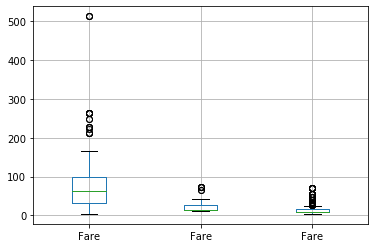

In [ ]:
means = data.groupby('Pclass', as_index=False)['Fare'].mean()
print(means)
fare1 = data.loc[data['Pclass'] == 1]['Fare']
fare1 = fare1[fare1 != 0]
print(fare1.mean())
fare2 = data.loc[data['Pclass'] == 2]['Fare']
fare2 = fare2[fare2 != 0]
print(fare2.mean())
fare3 = data.loc[data['Pclass'] == 3]['Fare']
fare3 = fare3[fare3 != 0]
print(fare3.mean())
x = pd.concat([pd.DataFrame(fare1),fare2,fare3], axis=1)
print(x)
#fare2class = pd.DataFrame(pd.concat([fare1,fare2,fare3], axis=1) , columns = ['class1' , 'class2' , 'class3'])
boxplot = x.boxplot()

part 6: categorical data

In [ ]:
data['E1'] = data.apply(
    lambda row: 1 if (row['Embarked']=='S' or row['Embarked']=='C') else 0,
    axis=1
)
# S=3 C=2 Q=1 NaN = 0
data['E0'] = data.apply(
    lambda row: 1 if (row['Embarked']=='S' or row['Embarked']=='Q') else 0,
    axis=1
)
print(data.loc[: , ['E1' , 'E0']])
print(data.Embarked)

data['Gender'] = data.apply(
    lambda row: 1 if (row['Sex']=='male') else 0,
    axis=1
)

data['Mr'] = data.apply(
    lambda row: 1 if (row['TitleCategory']=='Mr') else 0,
    axis=1
)
data['Miss'] = data.apply(
    lambda row: 1 if (row['TitleCategory']=='Miss') else 0,
    axis=1
)
data['OtherTitles'] = data.apply(
    lambda row: 1 if (row['TitleCategory']=='other') else 0,
    axis=1
)
#male = 1, female=0
print(data.Gender)

     E1  E0
0     1   1
1     1   0
2     1   1
3     1   1
4     1   1
..   ..  ..
886   1   1
887   1   1
888   1   1
889   1   0
890   0   1

[891 rows x 2 columns]
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Gender, Length: 891, dtype: int64


part 7 : delete categories

In [ ]:

newData = data.drop(['Sex' , 'Title' , 'Embarked' , 'TitleCategory'] , axis=1)
print(newData)
newData.to_csv("changedData.csv" , index=False)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name        Age  SibSp  \
0                              Braund, Mr. Owen Harris  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.000000      1   
2                               Heikkinen, Miss. Laina  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.000000      1   
4                             Allen, Mr. William Henry  35.000000      0   
..                                                 ...        ...    ...   
886        

# Step Two

In [ ]:
survived = newData.loc[newData['Survived']==1]
dead = newData.loc[newData['Survived']==0]
print(newData['Age'].mean())
print(newData['Age'].var())
print(newData['Age'].median())
print(newData['Age'].mode())


print(newData['SibSp'].mean())
print(newData['SibSp'].var())
print(newData['SibSp'].median())
print(newData['SibSp'].mode())

print(newData['Parch'].mean())
print(newData['Parch'].var())
print(newData['Parch'].median())
print(newData['Parch'].mode())


print(newData['Gender'].mean())
print(newData['Gender'].var())
print(newData['Gender'].median())
print(newData['Gender'].mode())



print('survived')
print(survived['Age'].mean())
print(survived['Age'].var())
print(survived['Age'].median())
print(survived['Age'].mode())


print(survived['SibSp'].mean())
print(survived['SibSp'].var())
print(survived['SibSp'].median())
print(survived['SibSp'].mode())

print(survived['Parch'].mean())
print(survived['Parch'].var())
print(survived['Parch'].median())
print(survived['Parch'].mode())


print(survived['Gender'].mean())
print(survived['Gender'].var())
print(survived['Gender'].median())
print(survived['Gender'].mode())

print('dead')
print(dead['Age'].mean())
print(dead['Age'].var())
print(dead['Age'].median())
print(dead['Age'].mode())


print(dead['SibSp'].mean())
print(dead['SibSp'].var())
print(dead['SibSp'].median())
print(dead['SibSp'].mode())

print(dead['Parch'].mean())
print(dead['Parch'].var())
print(dead['Parch'].median())
print(dead['Parch'].mode())


print(dead['Gender'].mean())
print(dead['Gender'].var())
print(dead['Gender'].median())
print(dead['Gender'].mode())



29.754658768465667
176.28348215691088
30.0
0    32.36809
dtype: float64
0.5230078563411896
1.2160430774662985
0.0
0    0
dtype: int64
0.38159371492704824
0.6497282437357343
0.0
0    0
dtype: int64
0.6475869809203143
0.2284745078752569
1.0
0    1
dtype: int64
survived
28.256061611109182
198.54272236824983
28.0
0    21.773973
dtype: float64
0.47368421052631576
0.5022379996913103
0.0
0    0
dtype: int64
0.4649122807017544
0.5955394350980089
0.0
0    0
dtype: int64
0.31871345029239767
0.2177719469739844
0.0
0    0
dtype: int64
dead
30.68821109599922
160.47938865693294
32.0
0    32.36809
dtype: float64
0.5537340619307832
1.659972345206281
0.0
0    0
dtype: int64
0.3296903460837887
0.6776022762022522
0.0
0    0
dtype: int64
0.8524590163934426
0.12600215388297234
1.0
0    1
dtype: int64


part 1: bar chart

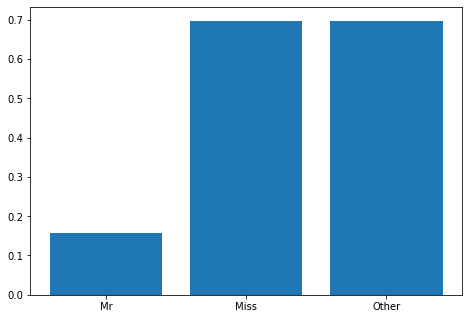

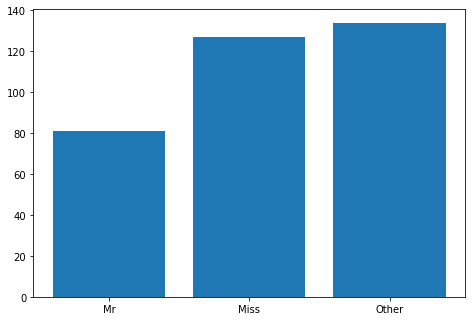

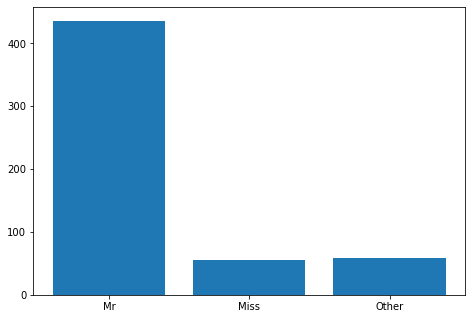

[436, 55, 58]
Title
Capt              0
Col               1
Don               0
Dr                3
Jonkheer          0
Lady              1
Major             1
Master           23
Miss            127
Mlle              2
Mme               1
Mr               81
Mrs              99
Ms                1
Rev               0
Sir               1
the Countess      1
Name: Survived, dtype: int64
[  0   1   0   3   0   1   1  23 127   2   1  81  99   1   0   1   1]


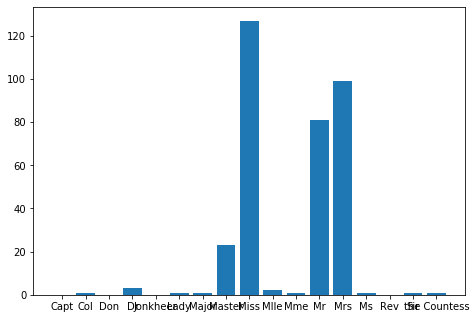

[  1   1   1   4   1   0   1  17  55   0   0 436  26   0   6   0   0]


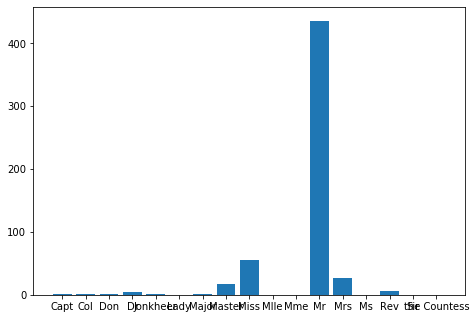

In [ ]:
import matplotlib.pyplot as plt
mr_survived = newData.loc[newData['Mr']==1]['Survived'].sum()/len(newData.loc[newData['Mr']==1])
miss_survived = newData.loc[newData['Miss']==1]['Survived'].sum()/len(newData.loc[newData['Miss']==1])
other_survived = newData.loc[newData['OtherTitles']==1]['Survived'].sum()/len(newData.loc[newData['OtherTitles']==1])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Mr' , 'Miss' , 'Other']
percents = [mr_survived , miss_survived  , other_survived]
ax.bar(titles,percents)
plt.show()

mr_survived = newData.loc[newData['Mr']==1]['Survived'].sum()
miss_survived = newData.loc[newData['Miss']==1]['Survived'].sum()
other_survived = newData.loc[newData['OtherTitles']==1]['Survived'].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Mr' , 'Miss' , 'Other']
percents = [mr_survived , miss_survived  , other_survived]
ax.bar(titles,percents)
plt.show()


mr_survived = newData.loc[newData['Mr']==1]['Survived'].count()- newData.loc[newData['Mr']==1]['Survived'].sum()
miss_survived = newData.loc[newData['Miss']==1]['Survived'].count()- newData.loc[newData['Miss']==1]['Survived'].sum()
other_survived = newData.loc[newData['OtherTitles']==1]['Survived'].count() - newData.loc[newData['OtherTitles']==1]['Survived'].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['Mr' , 'Miss' , 'Other']
percents = [mr_survived , miss_survived  , other_survived]
ax.bar(titles,percents)
plt.show()


print(percents)
print(data.groupby('Title').Survived.sum())
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
x = data.groupby('Title').Survived.sum()
print(x.values)
ax2.bar(x.keys() , x.values)
plt.show()

fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
x =data.groupby('Title').Survived.count()- data.groupby('Title').Survived.sum()
print(x.values)
ax2.bar(x.keys() , x.values)
plt.show()

part 2: boxplot

c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
c:\users\rahimi-lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


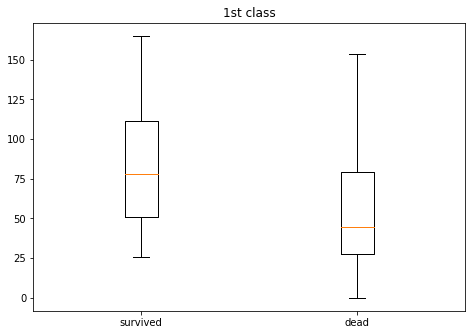

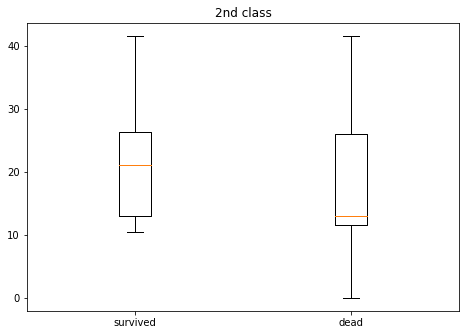

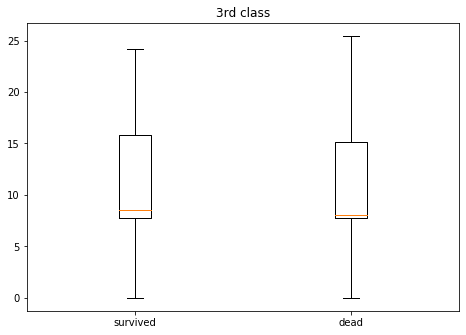

In [ ]:
survived = newData.loc[newData['Survived' ]== 1]
dead = newData.loc[newData['Survived'] == 0]
survivedC1 = survived.loc[survived['Pclass'] == 1]['Fare']
survivedC2 = survived.loc[survived['Pclass'] == 2]['Fare']
survivedC3 = survived.loc[survived['Pclass'] == 3]['Fare']
deadC1 = dead.loc[dead['Pclass'] == 1]['Fare']
deadC2 = dead.loc[dead['Pclass'] == 2]['Fare']
deadC3 = dead.loc[dead['Pclass'] == 3]['Fare']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('1st class')
ax.set_xticklabels(['survived' , 'dead'])
bp = ax.boxplot([survivedC1 , deadC1] , showfliers=False)
fig.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('2nd class')
ax.set_xticklabels(['survived' , 'dead'])
bp = ax.boxplot([survivedC2 , deadC2] , showfliers=False)
fig.show()



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('3rd class')
ax.set_xticklabels(['survived' , 'dead'])
bp = ax.boxplot([survivedC3 , deadC3] , showfliers=False)
fig.show()

part 3: Histogram

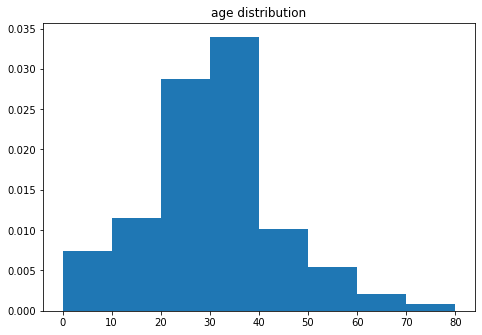

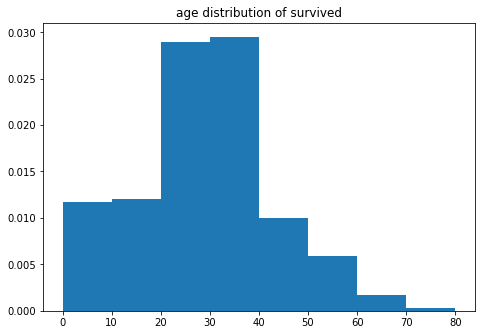

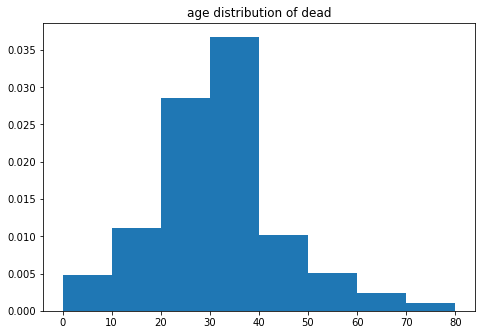

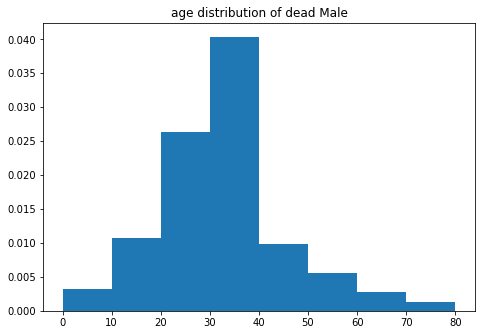

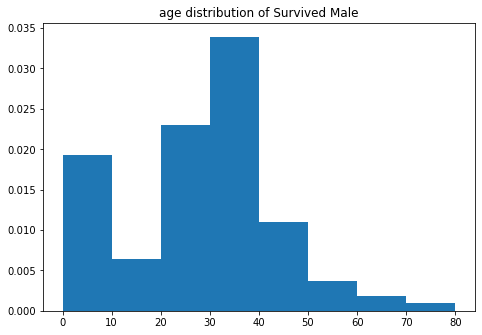

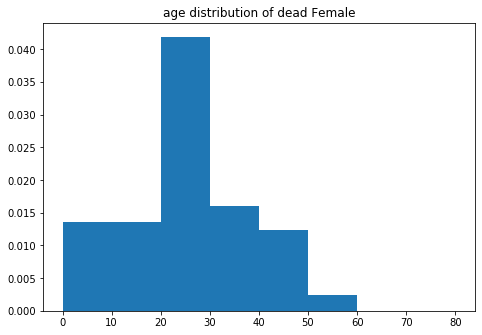

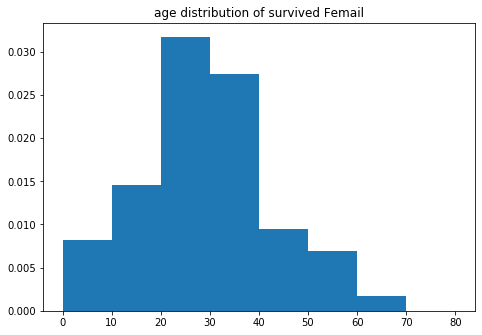

In [ ]:
bins = list(range(0,90,10))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('age distribution')
bp = ax.hist(newData['Age'] , bins=bins , density = 1)
#fig.show()
survived = newData.loc[newData['Survived']==1]
dead = newData.loc[newData['Survived']==0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('age distribution of survived')
bp = ax.hist(survived['Age'] , bins=bins , density = 1)
#fig.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('age distribution of dead')
bp = ax.hist(dead['Age'] , bins=bins , density = 1)
#fig.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('age distribution of dead Male')
bp = ax.hist(dead.loc[dead['Gender']==1]['Age'] , bins=bins , density = 1)
#fig.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('age distribution of Survived Male')
bp = ax.hist(survived.loc[survived['Gender']==1]['Age'] , bins=bins , density = 1)
#fig.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('age distribution of dead Female')
bp = ax.hist(dead.loc[dead['Gender']==0]['Age'] , bins=bins , density = 1)
#fig.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('age distribution of survived Femail')
bp = ax.hist(survived.loc[survived['Gender']==0]['Age'] , bins=bins , density = 1)
#fig.show()

part 4: heatmap

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.042594 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.089135 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.343567  0.083081  0.018443   
Age             0.042594 -0.089135 -0.343567  1.000000 -0.267660 -0.196802   
SibSp          -0.057527 -0.035322  0.083081 -0.267660  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.196802  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.091095  0.159651  0.216225   
E1              0.033218 -0.013613 -0.206095  0.035174  0.029797  0.084032   
E0              0.001199 -0.174718  0.251139 -0.049862  0.061970  0.013725   
Gender          0.042939 -0.543351  0.131900  0.117351 -0.114631 -0.245489   
Mr              0.038850 -0.549199  0.142698  0.231557 -0.250489 -0.333905   
Miss           -0.073110  0.327093 -0.000576 -0.304713  0.087932

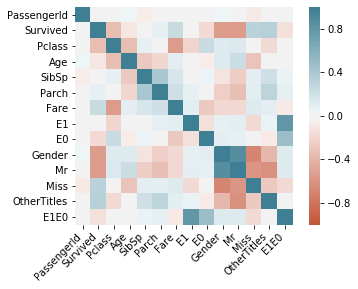

In [ ]:
import seaborn as sns
cData = newData
cData['E1E0'] = cData.apply(
    lambda row: (row['E0'] + 2*row['E1']),
    axis=1
)

corr = cData.corr()
print(corr)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Step Three

part 1: sex & age

In [ ]:
newData['Child'] = newData.apply(
    lambda row: 1 if (row['Age']<=15) else 0,
    axis=1
)
newData['Man'] = newData.apply(
    lambda row: 1 if (row['Age']>15 and row['Gender']==1) else 0,
    axis=1
)
newData['Woman'] = newData.apply(
    lambda row: 1 if (row['Age']>15 and row['Gender']==0) else 0,
    axis=1
)
print(newData.loc[:,['Child' , 'Man' , 'Woman']])

     Child  Man  Woman
0        0    1      0
1        0    0      1
2        0    0      1
3        0    0      1
4        0    1      0
..     ...  ...    ...
886      0    1      0
887      0    0      1
888      0    0      1
889      0    1      0
890      0    1      0

[891 rows x 3 columns]


part 2: relatives

In [ ]:
newData['FamilyCount'] = newData['Parch'] + newData['SibSp']
print(newData['FamilyCount'])

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilyCount, Length: 891, dtype: int64


part 3: cabin

In [ ]:
cabin_only = newData[["Cabin" , 'Pclass' , 'Fare']].copy()
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)
class2 = cabin_only.loc[cabin_only['Pclass']==2]
class3 = cabin_only.loc[cabin_only['Pclass']==3]

print(cabin_only.loc[cabin_only['Pclass']==1]['Deck'].value_counts())
print(cabin_only.loc[cabin_only['Pclass']==1].groupby('Deck')['Fare'].mean())

print(cabin_only.loc[cabin_only['Pclass']==2]['Deck'].value_counts())
print(cabin_only.loc[cabin_only['Pclass']==2].groupby('Deck')['Fare'].mean())
print(cabin_only.loc[cabin_only['Pclass']==3]['Deck'].value_counts())
print(cabin_only.loc[cabin_only['Pclass']==3].groupby('Deck')['Fare'].mean())

class2cab = {1:'C' , 2:'F' , 3:'F'}
cabin_only['FullDeck'] = cabin_only.apply(
    lambda row: class2cab[row['Pclass']] if pd.isna(row['Deck']) else row['Deck'],
    axis=1
)
newData['Deck'] = cabin_only['FullDeck']
print(newData['Deck'] )

C    59
B    47
D    29
E    25
A    15
T     1
Name: Deck, dtype: int64
Deck
A     39.623887
B    113.505764
C    100.151341
D     63.324286
E     55.740168
T     35.500000
Name: Fare, dtype: float64
F    8
E    4
D    4
Name: Deck, dtype: int64
Deck
D    13.166675
E    11.587500
F    23.750000
Name: Fare, dtype: float64
F    5
G    4
E    3
Name: Deck, dtype: int64
Deck
E    11.00000
F    10.61166
G    13.58125
Name: Fare, dtype: float64
0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: Deck, Length: 891, dtype: object


part 4: new data

0.30353817504655495


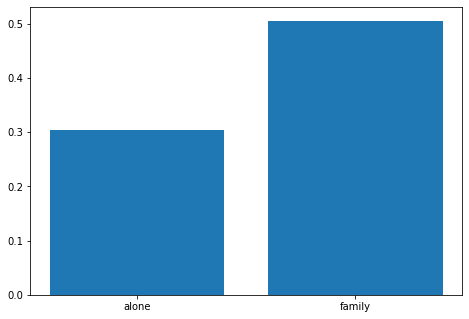

0.30353817504655495
[0.5227272727272727, 0.6511627906976745]


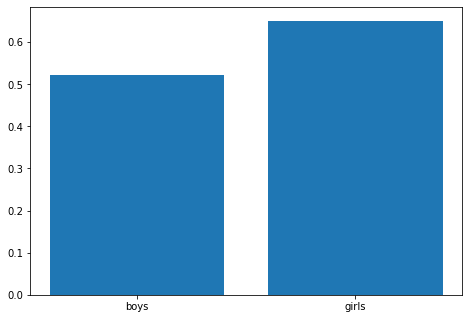

In [ ]:
alone = newData.loc[newData['FamilyCount']==0]
withFamily = newData.loc[newData['FamilyCount']>0]
alonepc = alone.loc[alone['Survived']==1]['PassengerId'].count()/alone['PassengerId'].count()
familypc = withFamily.loc[withFamily['Survived']==1]['PassengerId'].count()/withFamily['PassengerId'].count()
print(alonepc)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['alone' , 'family']
percents = [alonepc , familypc ]
ax.bar(titles,percents)
plt.show()

newData['Alone'] =  newData.apply(
    lambda row: 1 if row['FamilyCount']==0 else 0,
    axis=1
)

##############################################################################################

child = newData.loc[newData['Child']==1]
girl = child.loc[child['Gender']==0]
boy = child.loc[child['Gender']==1]
girlpc = girl.loc[girl['Survived']==1]['PassengerId'].count() / girl['PassengerId'].count()
boypc = boy.loc[boy['Survived']==1]['PassengerId'].count() / boy['PassengerId'].count()
print(alonepc)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
titles = ['boys' , 'girls']
percents = [boypc , girlpc ]
print(percents)
ax.bar(titles,percents)
plt.show()

newData['Girl'] =  newData.apply(
    lambda row: 1 if (row['Gender']==0 and row['Child']==1) else 0,
    axis=1
)